In [180]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


In [181]:
df = pd.read_csv("data\\Healthcare-Diabetes.csv")

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [183]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [184]:
df = df.drop(columns=['Id'])

In [144]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


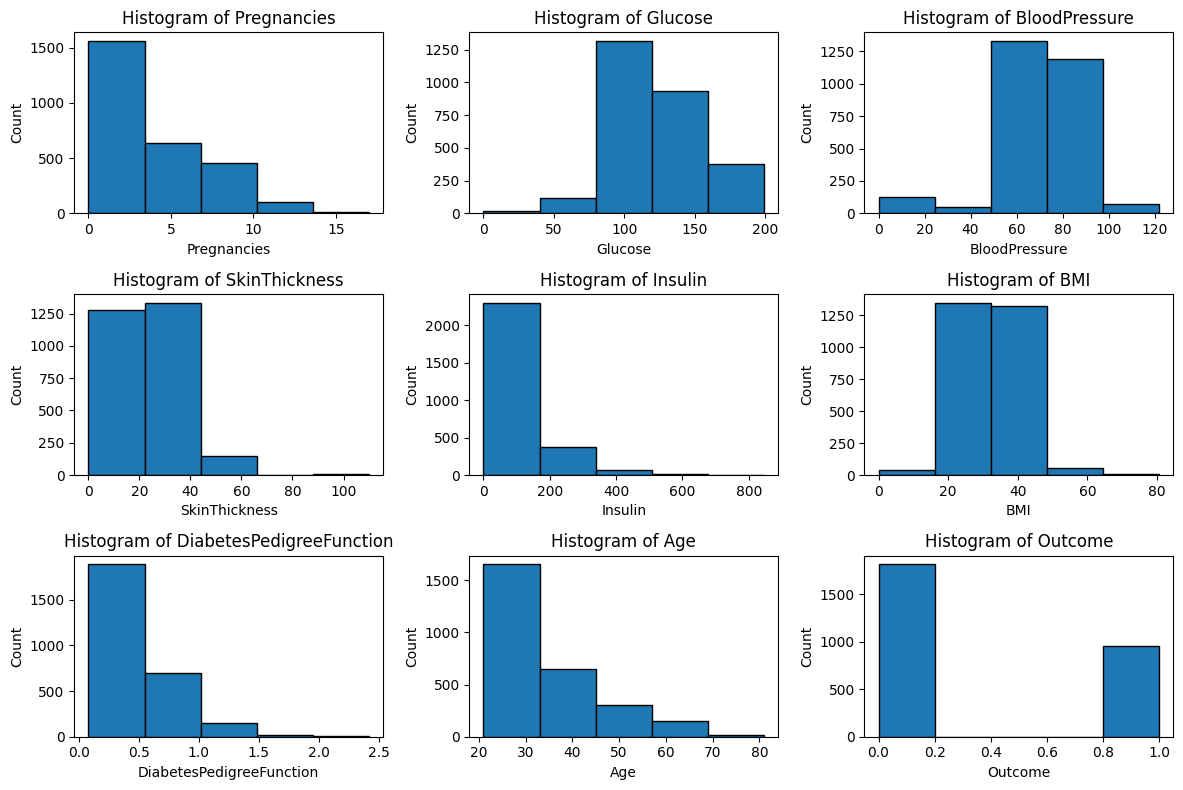

In [185]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, column in enumerate(df.columns):
    row = i // 3  
    col = i % 3   
    axes[row, col].hist(df[column], bins=5, edgecolor='black') 
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Histogram of {column}')

plt.tight_layout() 
plt.savefig('Plots\\hists.png')
plt.show()



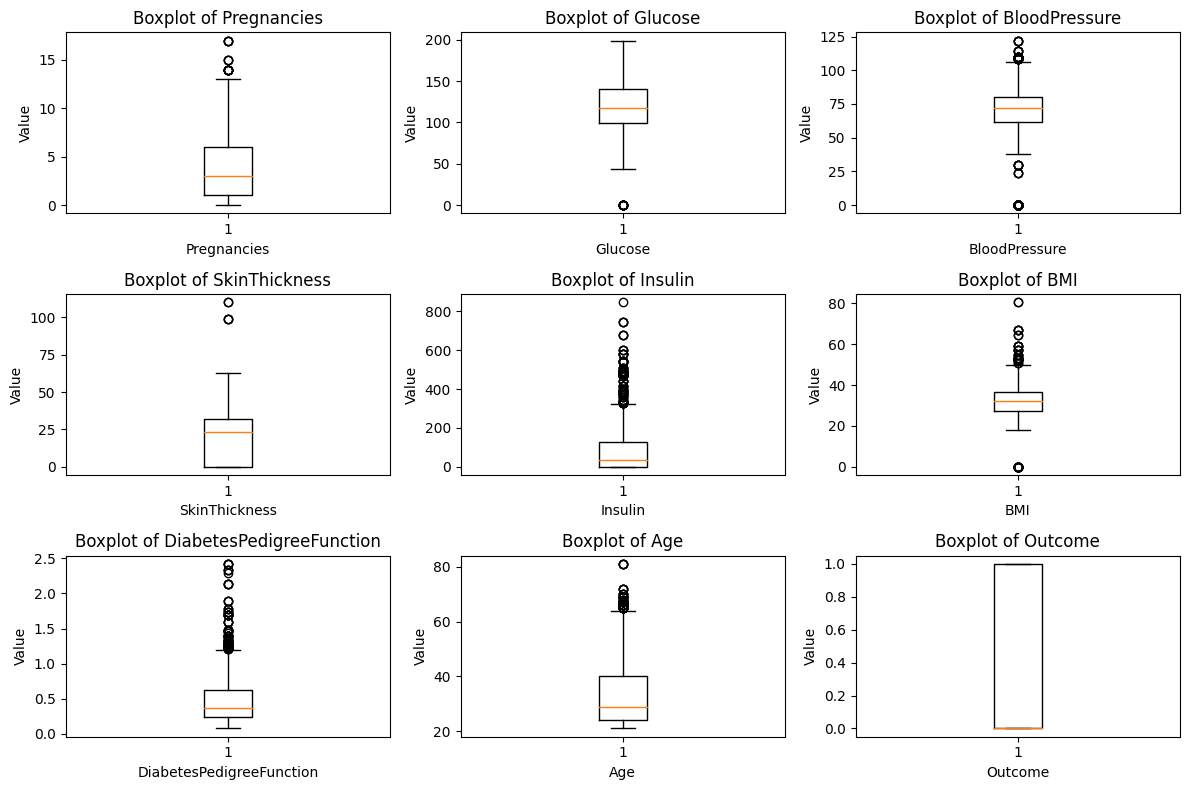

In [186]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, column in enumerate(df.columns):
    row = i // 3  
    col = i % 3   
    axes[row, col].boxplot(df[column])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Value')
    axes[row, col].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.savefig('Plots\\boxplots.png')
plt.show()

In [187]:
correlation_matrix = df.corr()

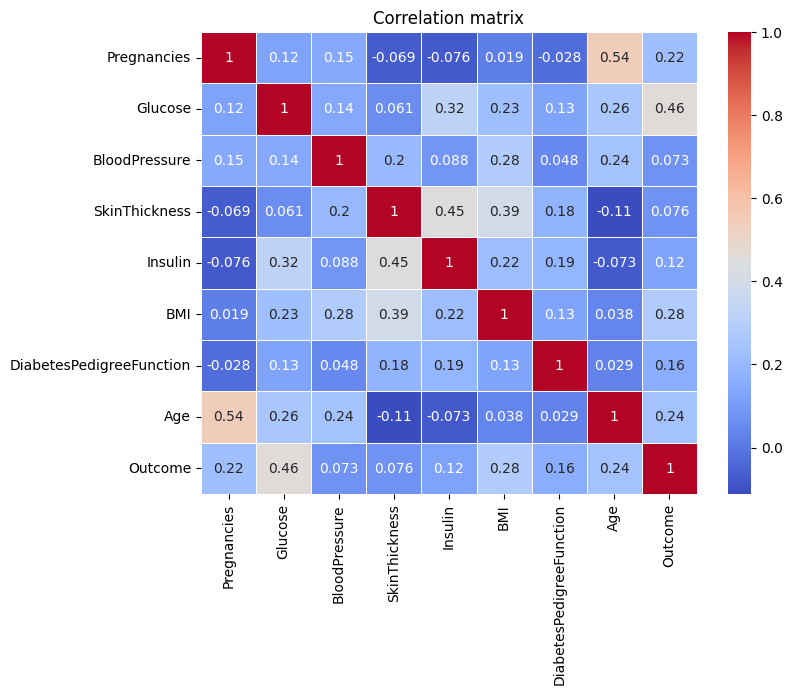

In [188]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.savefig('Plots\\corr.png')
plt.show()

In [189]:
df2 = df.loc[df['Outcome'] == 0]

In [190]:
df2 = df2.drop(columns=['Outcome'])


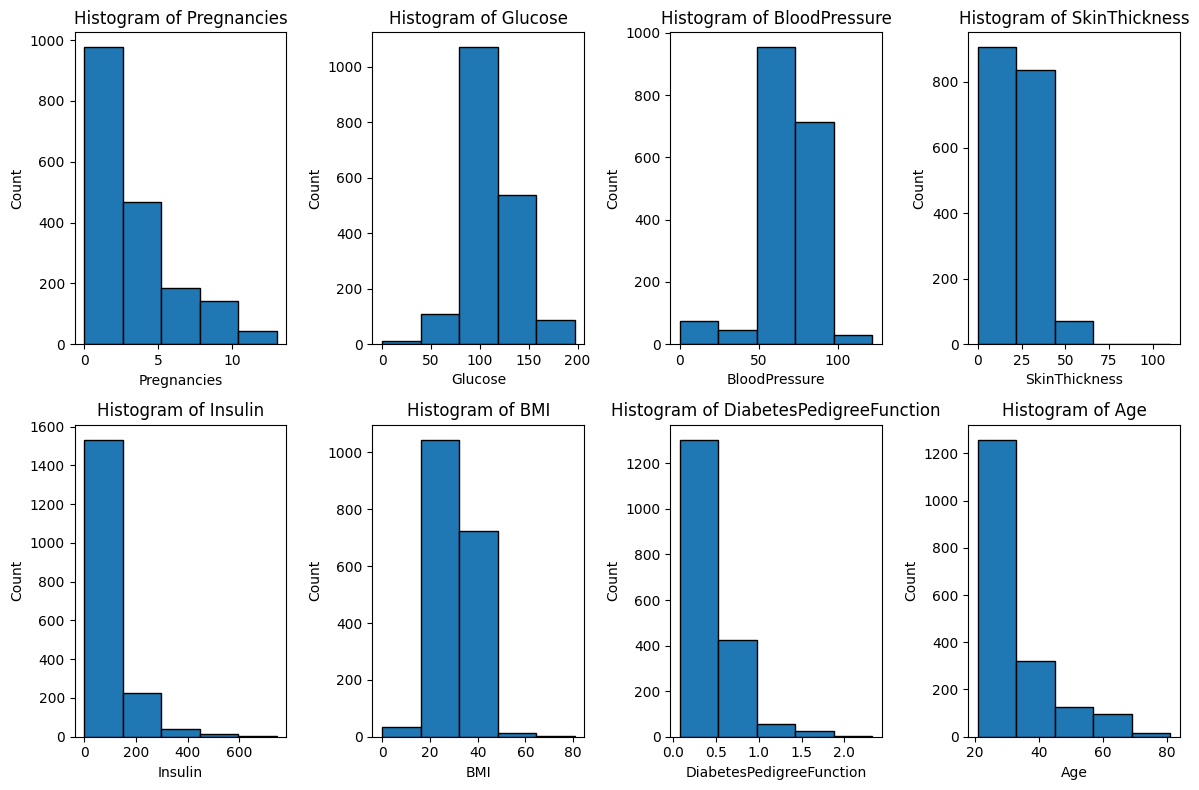

In [191]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

for i, column in enumerate(df2.columns):
    row = i // 4 
    col = i % 4  
    axes[row, col].hist(df2[column], bins=5, edgecolor='black') 
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Histogram of {column}')

plt.tight_layout() 
plt.savefig('Plots\\hists0.png')
plt.show()

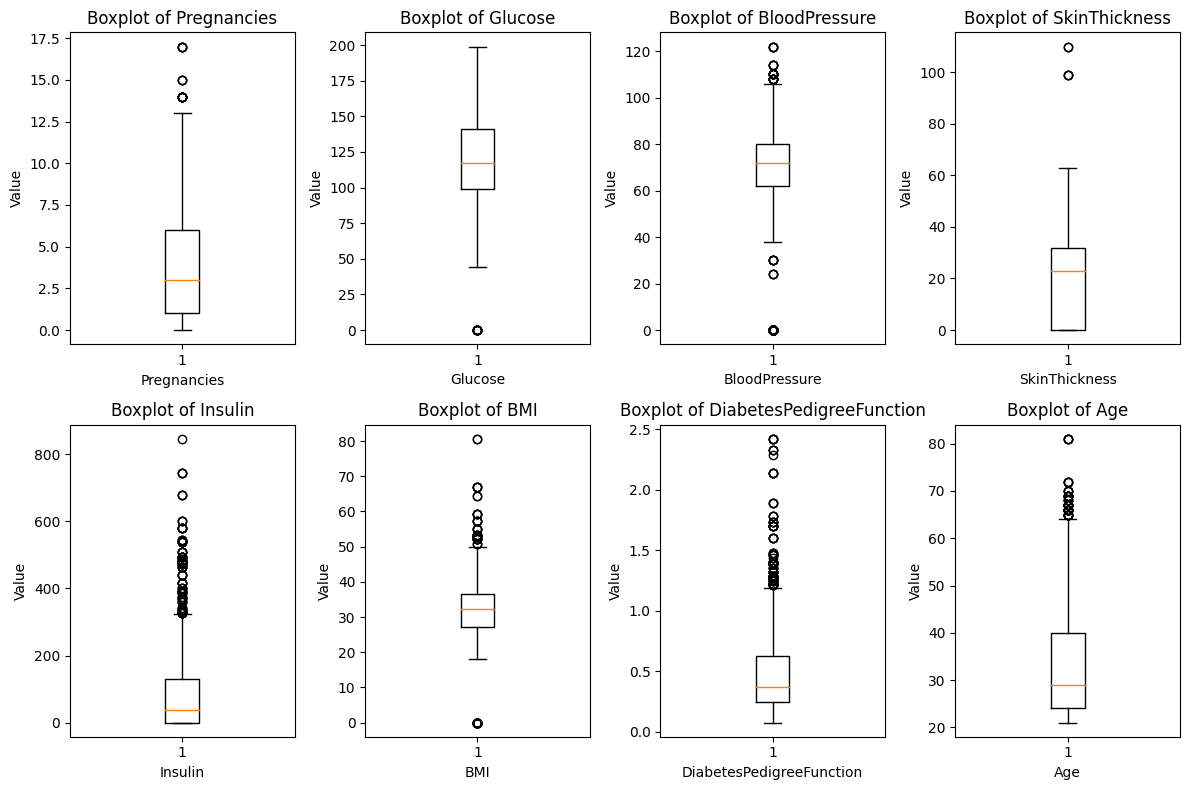

In [192]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

for i, column in enumerate(df2.columns):
    row = i // 4 
    col = i % 4 
    axes[row, col].boxplot(df[column])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Value')
    axes[row, col].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.savefig('Plots\\boxplots0.png')
plt.show()

In [193]:
colors = {0: 'blue', 1: 'red'}

In [155]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']



In [194]:
df_subset = df[numeric_columns + ['Outcome']]

In [195]:
colors = {1: 'blue', 0: 'red'}

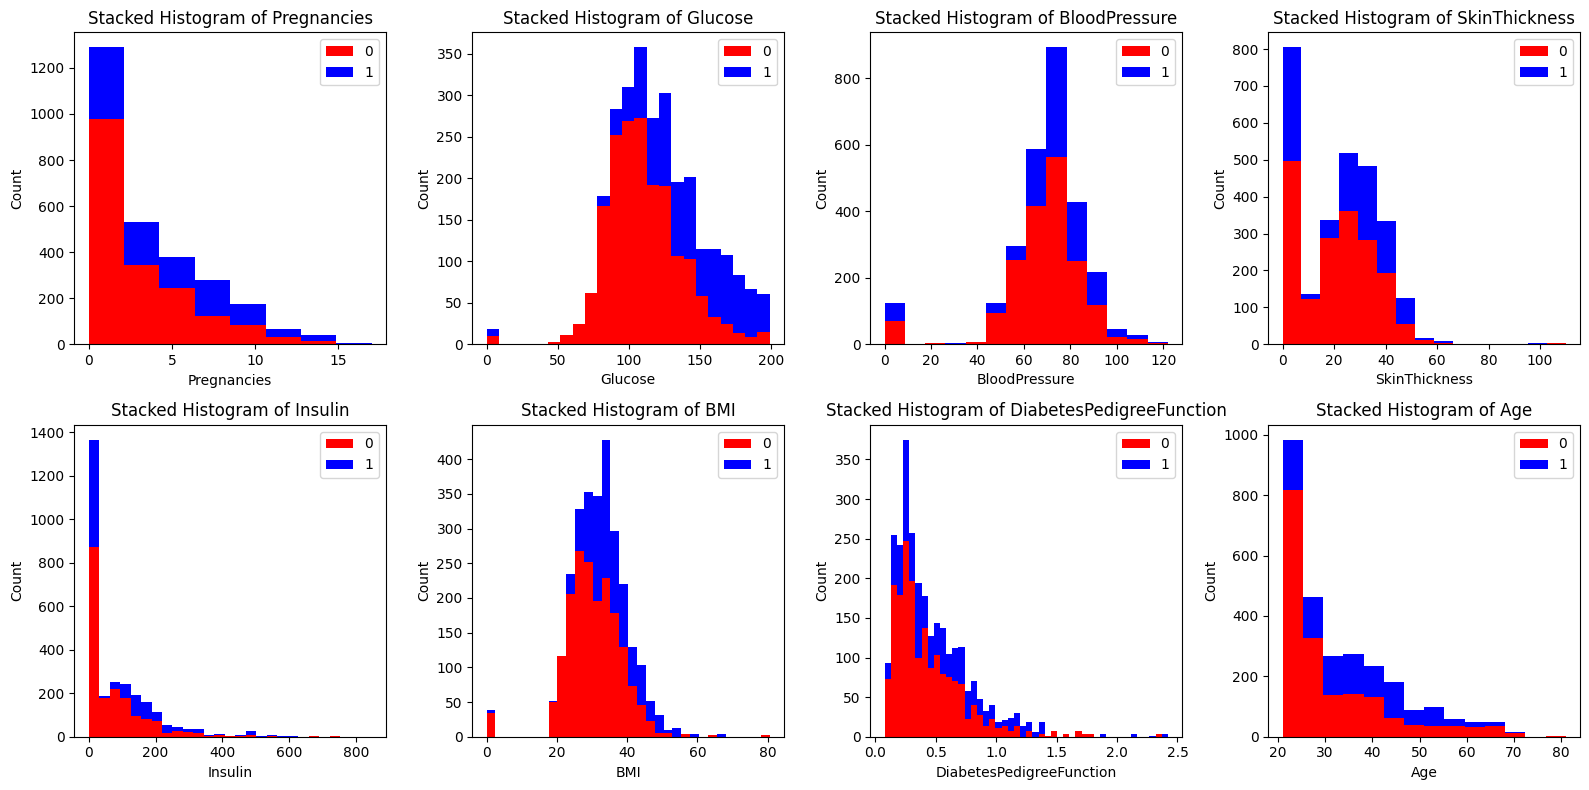

In [196]:
variables_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Tworzenie subplotów w układzie 2 wiersze na 4 kolumny
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables_to_plot):
    outcome_0 = df[df['Outcome'] == 0][var]
    outcome_1 = df[df['Outcome'] == 1][var]
    uni = liczba_unikalnych_k1 = df[var].nunique()
    uni2 = round(np.sqrt(uni)*2,0)
    uni2 = int(uni2)
    # Tworzenie stacked histogramu
    axes[i].hist([outcome_0, outcome_1], bins=uni2, color=['red', 'blue'], label=['0', '1'], stacked=True)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Stacked Histogram of {var}')
    axes[i].legend()

plt.tight_layout()
plt.savefig('Plots\\stackedhist.png')
plt.show()

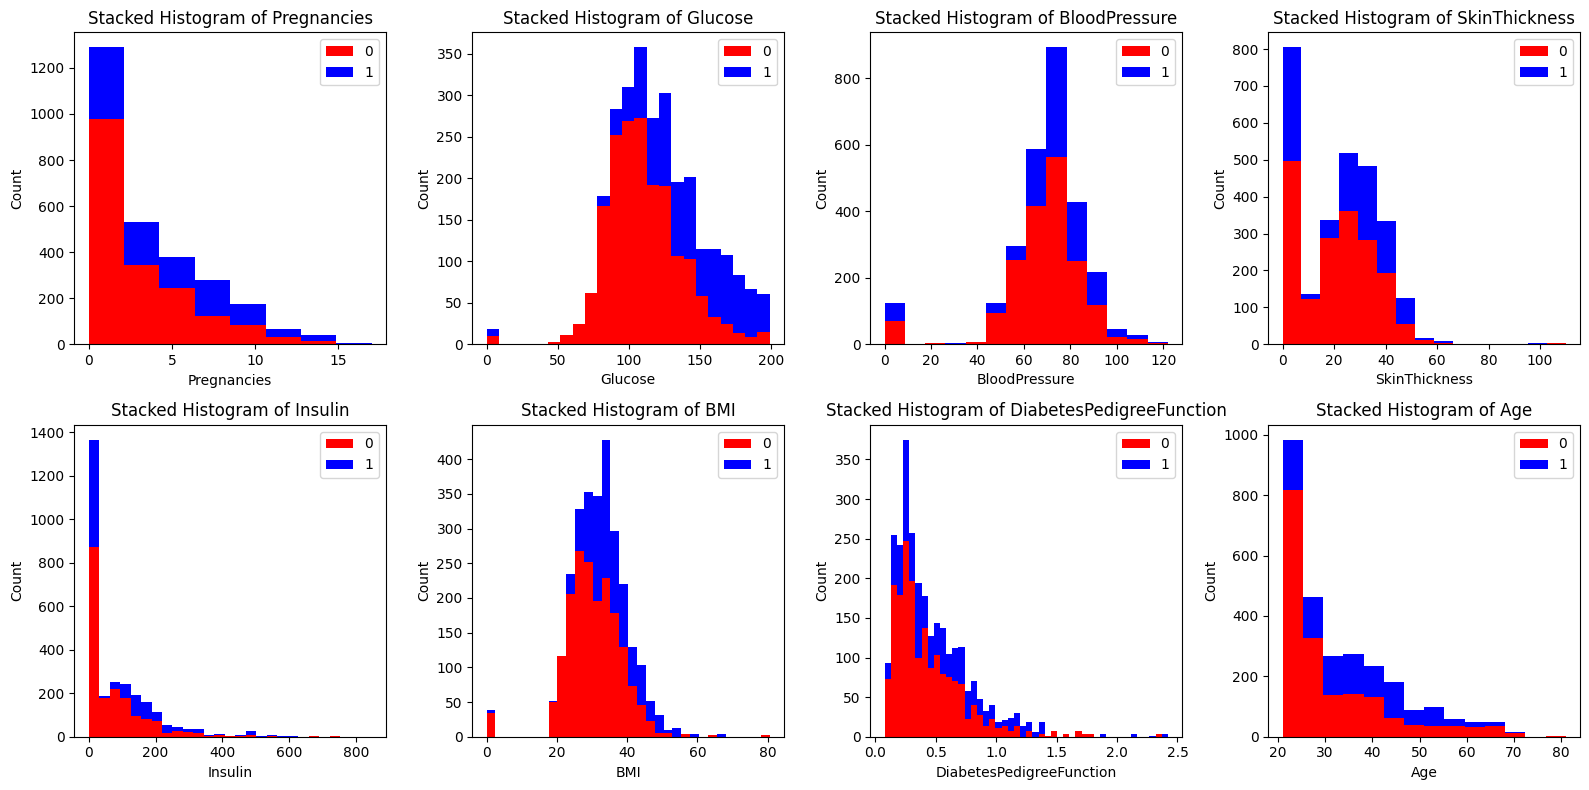

In [198]:

variables_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# Tworzenie subplotów w układzie 2 wiersze na 4 kolumny
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables_to_plot):
    outcome_0 = df[df['Outcome'] == 0][var]
    outcome_1 = df[df['Outcome'] == 1][var]
    uni = liczba_unikalnych_k1 = df[var].nunique()
    uni2 = round(np.sqrt(uni)*2,0)
    uni2 = int(uni2)
    # Tworzenie stacked histogramu
    axes[i].hist([outcome_0, outcome_1], bins=uni2, color=['red', 'blue'], label=['0', '1'], stacked=True)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Stacked Histogram of {var}')
    axes[i].legend()

plt.tight_layout()
plt.savefig('Plots\\stackedhist.png')
plt.show()

In [199]:
df = pd.read_csv("data\\diabetes_data.csv",sep=';')

In [200]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


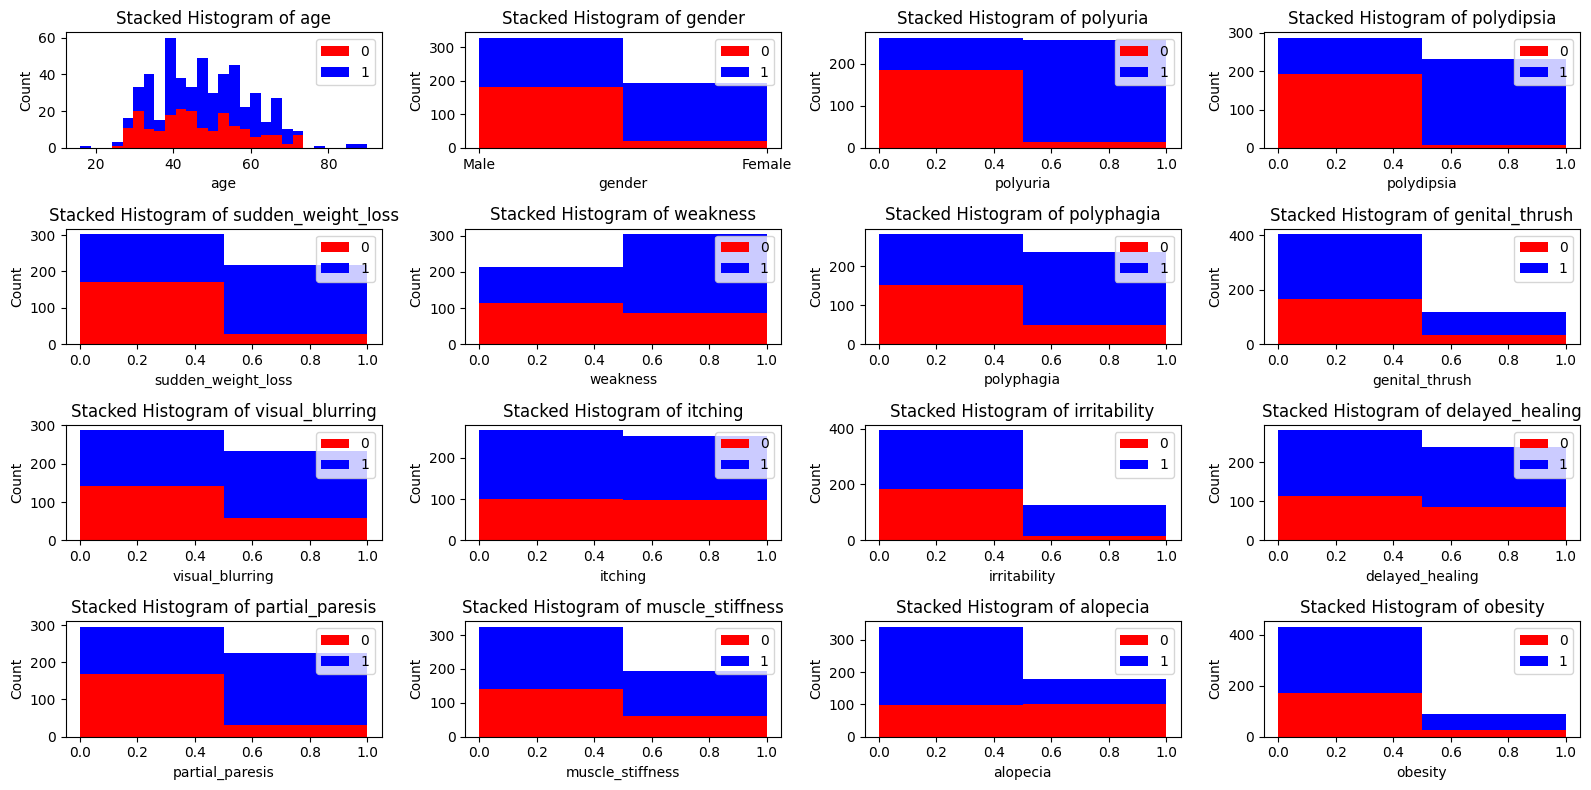

In [202]:
variables_to_plot = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables_to_plot):
    outcome_0 = df[df['class'] == 0][var]
    outcome_1 = df[df['class'] == 1][var]
    uni = liczba_unikalnych_k1 = df[var].nunique()
    uni2 = round(uni/2,0)+1
    uni2 = int(uni2)
    # Tworzenie stacked histogramu
    axes[i].hist([outcome_0, outcome_1], bins=uni2, color=['red', 'blue'], label=['0', '1'], stacked=True)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Stacked Histogram of {var}')
    axes[i].legend()

plt.tight_layout()
plt.savefig('Plots\\stackedhist2.png')
plt.show()